# Diabetes Prediction using Machine Learning

This notebook aims to predict diabetes using machine learning models based on diagnostic measurements. It includes data preprocessing, visualization, model training, and evaluation.

# Package Installation

In [1]:
!pip install --upgrade pandas numpy seaborn matplotlib scikit-learn joblib rich


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from rich.console import Console
from rich.table import Table
from rich.panel import Panel

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


console = Console()

print("Imported libraries successfully!")


Imported libraries successfully!


#  Diabetics Dataset Load

In [3]:
# Load the dataset
dataset = pd.read_csv('diabetes-dataset.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


# Preview Dataset

In [4]:
table = Table(title="Preview (first 5 rows)", show_lines=True)
for col in dataset.columns:
    table.add_column(str(col), style="cyan")

for _, row in dataset.head().iterrows():
    table.add_row(*[str(val) for val in row.values])

console.print(table)

                                              Preview (first 5 rows)                                               
┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┓
┃ Pregnancies ┃ Glucose ┃ BloodPressure ┃ SkinThickness ┃ Insulin ┃ BMI  ┃ DiabetesPedigreeFunc… ┃ Age  ┃ Outcome ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━┩
│ 6.0         │ 148.0   │ 72.0          │ 35.0          │ 0.0     │ 33.6 │ 0.627                 │ 50.0 │ 1.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 1.0         │ 85.0    │ 66.0          │ 29.0          │ 0.0     │ 26.6 │ 0.351                 │ 31.0 │ 0.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 8.0         │ 183.0   │ 64.0          │ 0.0           │ 0.0     │ 23.3 │ 0.672                 │ 32.0 │ 1.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 1.0         │ 89.0    │ 66.0          │ 23.0          │ 94.0    │ 28.1 │ 0.167                 │ 21.0 │ 0.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 0.0         │ 137.0   │ 40.0          │ 35.0          │ 168.0   │ 43.1 │ 2.288                 │ 33.0 │ 1.0     │
└─────────────┴─────────┴───────────────┴───────────────┴─────────┴──────┴───────────────────────┴──────┴─────────┘

# Dataset Overview

In [5]:
desc = dataset.describe(include='all').T
desc['Zero_Count'] = dataset.isnull().sum()
desc['Distinct_Count'] = dataset.nunique()
desc['Column_data_Type'] = dataset.dtypes

# Table
summary_table = Table(title="Concise Dataset Summary", show_lines=True)
summary_table.add_column("Feature", style="bold magenta")
summary_table.add_column("Data Type", style="cyan")
summary_table.add_column("Non-Null Count", justify="right", style="green")
summary_table.add_column("Mean", justify="right")
summary_table.add_column("Std", justify="right")
summary_table.add_column("Min", justify="right")
summary_table.add_column("25%", justify="right")
summary_table.add_column("50%", justify="right")
summary_table.add_column("75%", justify="right")
summary_table.add_column("Max", justify="right")
summary_table.add_column("Zero Count", justify="right")
summary_table.add_column("Distinct Count", justify="right")

for feature, row in desc.iterrows():
    summary_table.add_row(
        feature,
        str(row["Column_data_Type"]),
        str(int(row["count"])) if "count" in row else "-",
        f"{row['mean']:.2f}" if "mean" in row and pd.notnull(row['mean']) else "-",
        f"{row['std']:.2f}" if "std" in row and pd.notnull(row['std']) else "-",
        f"{row['min']:.2f}" if "min" in row and pd.notnull(row['min']) else "-",
        f"{row['25%']:.2f}" if "25%" in row and pd.notnull(row['25%']) else "-",
        f"{row['50%']:.2f}" if "50%" in row and pd.notnull(row['50%']) else "-",
        f"{row['75%']:.2f}" if "75%" in row and pd.notnull(row['75%']) else "-",
        f"{row['max']:.2f}" if "max" in row and pd.notnull(row['max']) else "-",
        str(row["Zero_Count"]),
        str(row["Distinct_Count"])
    )

console.print(summary_table)

                                              Concise Dataset Summary                                              
┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃          ┃ Data    ┃ Non-Null ┃        ┃        ┃       ┃       ┃        ┃        ┃        ┃    Zero ┃ Distinct ┃
┃ Feature  ┃ Type    ┃    Count ┃   Mean ┃    Std ┃   Min ┃   25% ┃    50% ┃    75% ┃    Max ┃   Count ┃    Count ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ Pregnan… │ int64   │      768 │   3.85 │   3.37 │  0.00 │  1.00 │   3.00 │   6.00 │  17.00 │       0 │       17 │
├──────────┼─────────┼──────────┼────────┼────────┼───────┼───────┼────────┼────────┼────────┼─────────┼──────────┤
│ Glucose  │ int64   │      768 │ 120.89 │  31.97 │  0.00 │ 99.00 │ 117.00 │ 140.25 │ 199.00 │       0 │      136 │
├──────────┼─────────┼──────────┼────────┼────────┼───────┼───────┼────────┼────────┼────────┼─────────┼──────────┤
│ BloodPr… │ int64   │      768 │  69.11 │  19.36 │  0.00 │ 62.00 │  72.00 │  80.00 │ 122.00 │       0 │       47 │
├──────────┼─────────┼──────────┼────────┼────────┼───────┼───────┼────────┼────────┼────────┼─────────┼──────────┤
│ SkinThi… │ int64   │      768 │  20.54 │  15.95 │  0.00 │  0.00 │  23.00 │  32.00 │  99.00 │       0 │       51 │
├──────────┼─────────┼──────────┼────────┼────────┼───────┼───────┼────────┼────────┼────────┼─────────┼──────────┤
│ Insulin  │ int64   │      768 │  79.80 │ 115.24 │  0.00 │  0.00 │  30.50 │ 127.25 │ 846.00 │       0 │      186 │
├──────────┼─────────┼──────────┼────────┼────────┼───────┼───────┼────────┼────────┼────────┼─────────┼──────────┤
│ BMI      │ float64 │      768 │  31.99 │   7.88 │  0.00 │ 27.30 │  32.00 │  36.60 │  67.10 │       0 │      248 │
├──────────┼─────────┼──────────┼────────┼────────┼───────┼───────┼────────┼────────┼────────┼─────────┼──────────┤
│ Diabete… │ float64 │      768 │   0.47 │   0.33 │  0.08 │  0.24 │   0.37 │   0.63 │   2.42 │       0 │      517 │
├──────────┼─────────┼──────────┼────────┼────────┼───────┼───────┼────────┼────────┼────────┼─────────┼──────────┤
│ Age      │ int64   │      768 │  33.24 │  11.76 │ 21.00 │ 24.00 │  29.00 │  41.00 │  81.00 │       0 │       52 │
├──────────┼─────────┼──────────┼────────┼────────┼───────┼───────┼────────┼────────┼────────┼─────────┼──────────┤
│ Outcome  │ int64   │      768 │   0.35 │   0.48 │  0.00 │  0.00 │   0.00 │   1.00 │   1.00 │       0 │        2 │
└──────────┴─────────┴──────────┴────────┴────────┴───────┴───────┴────────┴────────┴────────┴─────────┴──────────┘

# Dataset Vitualization

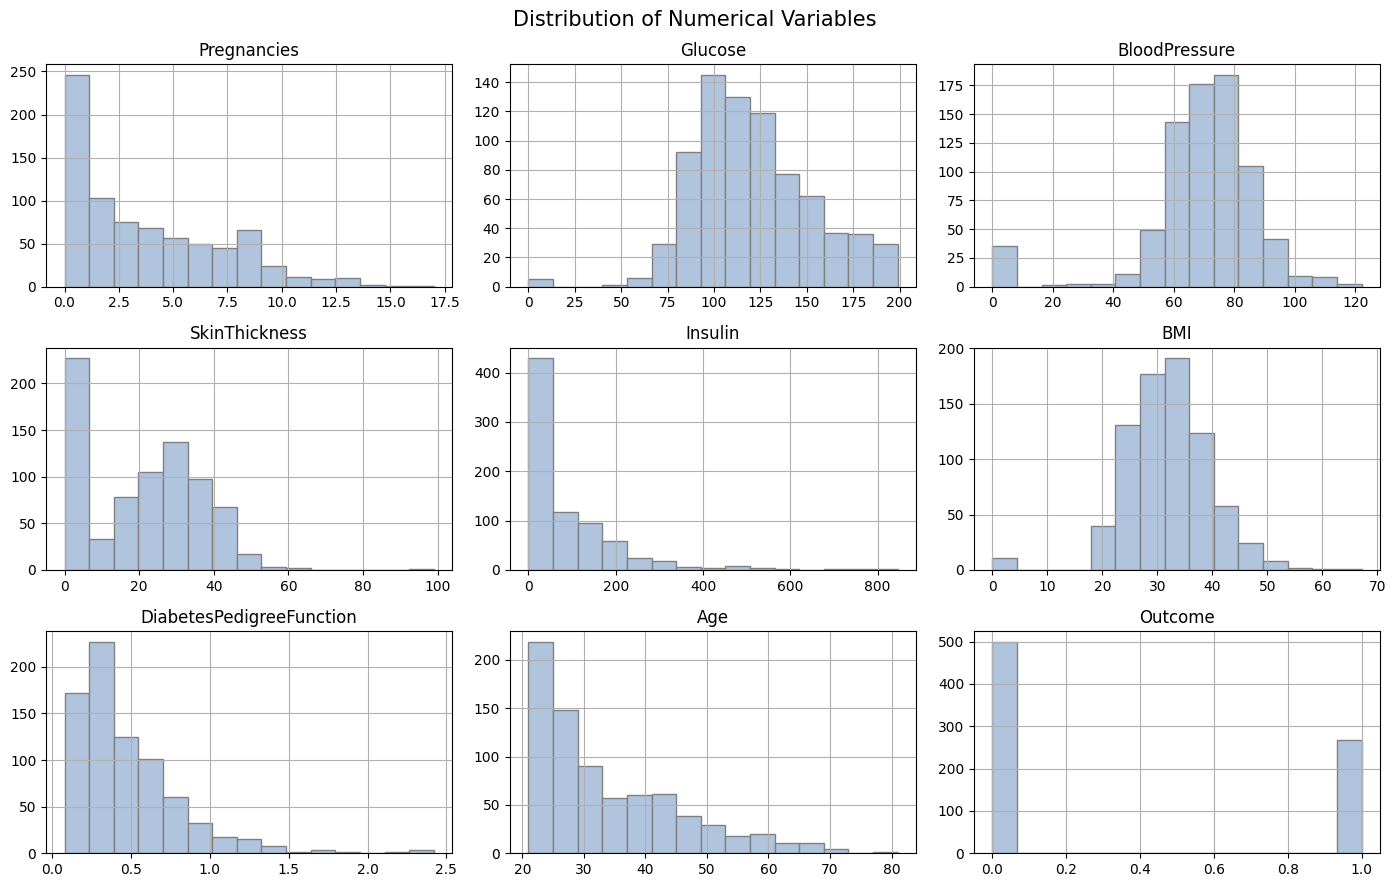

In [6]:
# Histogram for numerical features
dataset.hist(
    bins=15,
    figsize=(14, 9),
    color='lightsteelblue',
    edgecolor='gray'
)
plt.suptitle("Distribution of Numerical Variables", fontsize=15)
plt.tight_layout()
plt.show()


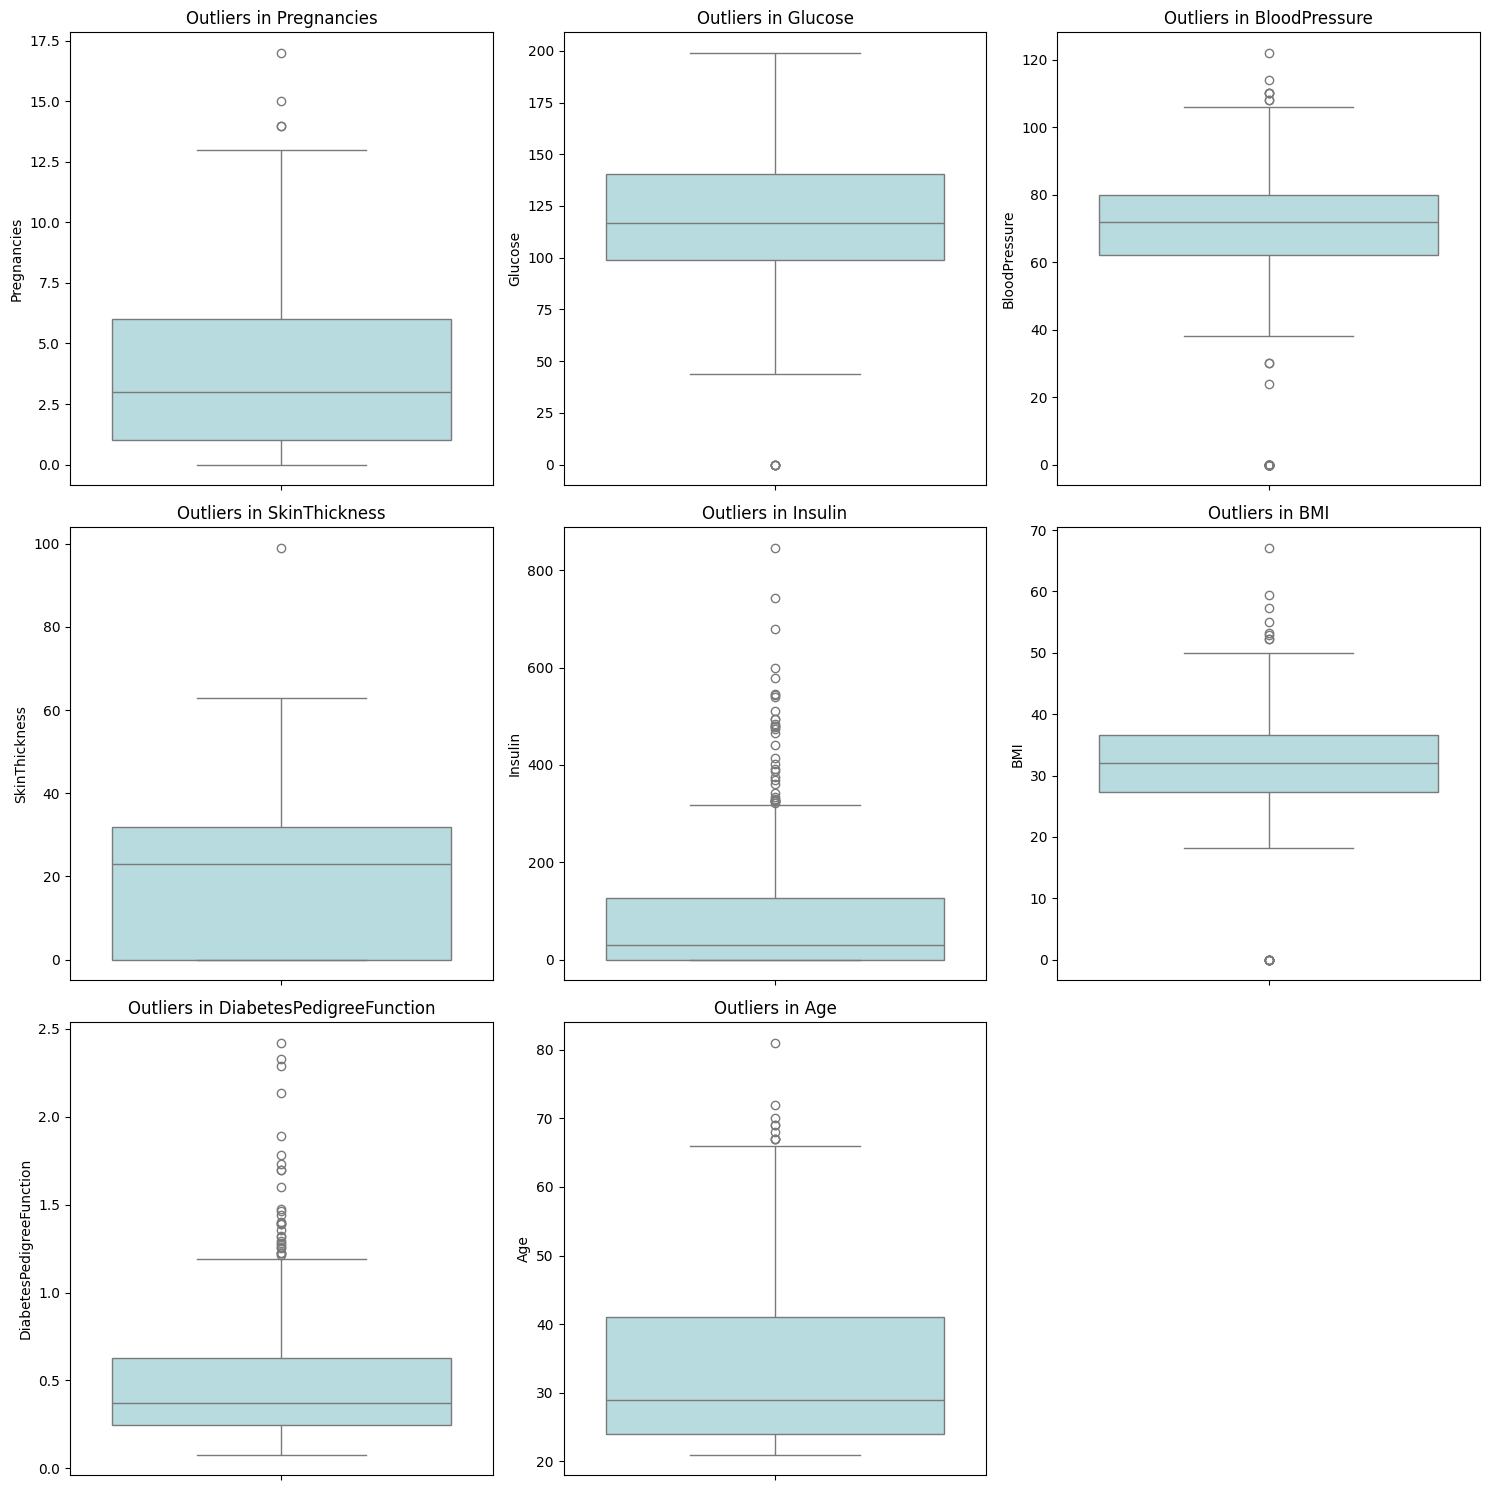

In [7]:
# Box plots for detecting outliers
num_columns = dataset.select_dtypes(include='number').columns[:-1]  # adjust slice if needed
rows, cols = (len(num_columns) + 2) // 3, 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.boxplot(y=dataset[col], ax=axes[i], color='powderblue')
    axes[i].set_title(f'Outliers in {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) 
plt.tight_layout()
plt.show()


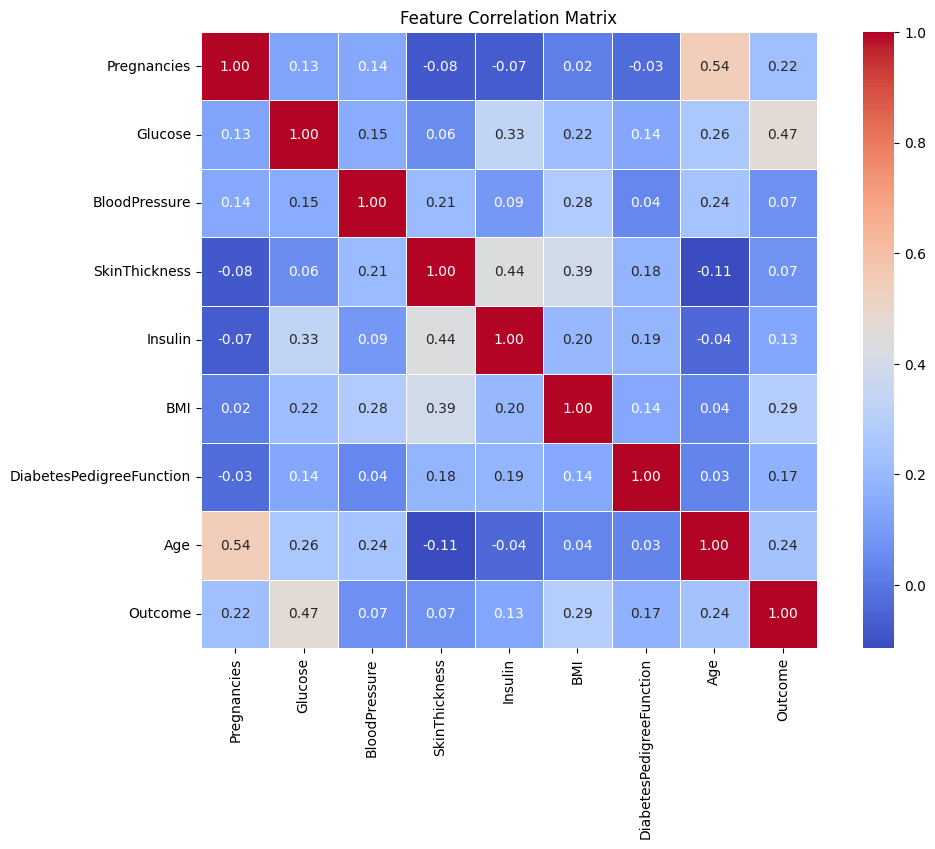

In [8]:
# Correlation heatmap
corr = dataset.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr, annot=True, fmt=".2f",
    cmap="coolwarm", square=True,
    linewidths=0.4, cbar=True
)
plt.title("Feature Correlation Matrix")
plt.show()

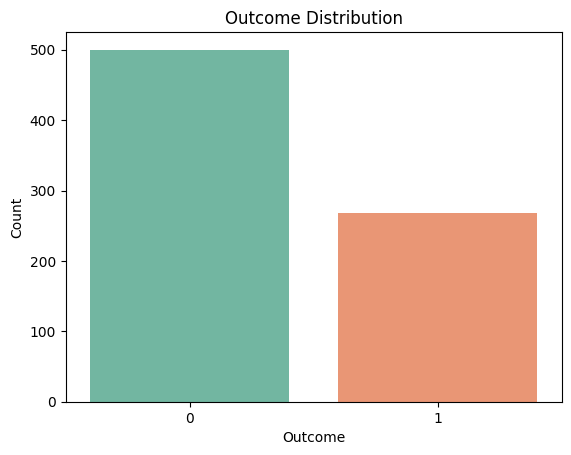

In [9]:
# Bar plot for target distribution
sns.countplot(x='Outcome', data=dataset, hue='Outcome', palette='Set2', legend=False)
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

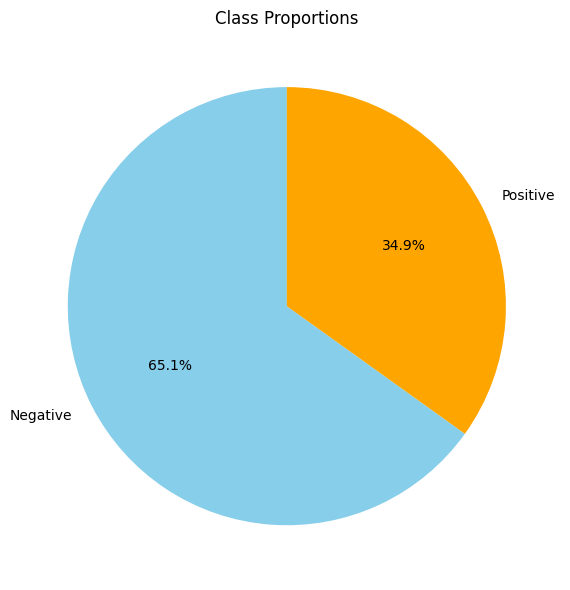

In [10]:
# Pie chart for target proportions
class_counts = dataset['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts,
    labels=['Negative', 'Positive'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'orange']
)
plt.title("Class Proportions")
plt.tight_layout()
plt.show()


# Data Preprocessing

###  Step 1: Handle zero Values

In [11]:

# Replace zero values in specific columns with NaN for better handling
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
dataset[columns_with_zeros] = dataset[columns_with_zeros].replace(0, np.nan)

# Use KNN Imputer to fill zero values based on similar rows
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
dataset[columns_with_zeros] = knn_imputer.fit_transform(dataset[columns_with_zeros])

In [12]:
# Display the dataset after handling zero values (first 5 rows)
preview_table = Table(title="Preview After Zero Value Imputation", show_lines=True)
for col in dataset.columns:
    preview_table.add_column(col, overflow="fold")

for _, row in dataset.head().iterrows():
    preview_table.add_row(*[str(round(val, 2)) if isinstance(val, float) else str(val) for val in row])

console.print(preview_table)

                                        Preview After Zero Value Imputation                                        
┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┓
┃             ┃         ┃               ┃               ┃         ┃      ┃ DiabetesPedigreeFunct ┃      ┃         ┃
┃ Pregnancies ┃ Glucose ┃ BloodPressure ┃ SkinThickness ┃ Insulin ┃ BMI  ┃ ion                   ┃ Age  ┃ Outcome ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━┩
│ 6.0         │ 148.0   │ 72.0          │ 35.0          │ 209.0   │ 33.6 │ 0.63                  │ 50.0 │ 1.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 1.0         │ 85.0    │ 66.0          │ 29.0          │ 73.0    │ 26.6 │ 0.35                  │ 31.0 │ 0.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 8.0         │ 183.0   │ 64.0          │ 29.4          │ 383.2   │ 23.3 │ 0.67                  │ 32.0 │ 1.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 1.0         │ 89.0    │ 66.0          │ 23.0          │ 94.0    │ 28.1 │ 0.17                  │ 21.0 │ 0.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 0.0         │ 137.0   │ 40.0          │ 35.0          │ 168.0   │ 43.1 │ 2.29                  │ 33.0 │ 1.0     │
└─────────────┴─────────┴───────────────┴───────────────┴─────────┴──────┴───────────────────────┴──────┴─────────┘

### Step 2: Outlier Detection and Removal

In [13]:
# Function to remove outliers using the Interquartile Range (IQR) method
def filter_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# Apply outlier filtering to the selected columns (columns with zeros and Age)
for feature in columns_with_zeros + ["Age"]:
    dataset = filter_outliers(dataset, feature)

In [14]:
# Display dataset after removing outliers (first 5 rows)
outlier_table = Table(title="Preview After Removing Outliers", show_lines=True)
for col in dataset.columns:
    outlier_table.add_column(col, overflow="fold")

for _, row in dataset.head().iterrows():
    outlier_table.add_row(*[str(round(val, 2)) if isinstance(val, float) else str(val) for val in row])

console.print(outlier_table)

                                          Preview After Removing Outliers                                          
┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┓
┃             ┃         ┃               ┃               ┃         ┃      ┃ DiabetesPedigreeFunct ┃      ┃         ┃
┃ Pregnancies ┃ Glucose ┃ BloodPressure ┃ SkinThickness ┃ Insulin ┃ BMI  ┃ ion                   ┃ Age  ┃ Outcome ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━┩
│ 6.0         │ 148.0   │ 72.0          │ 35.0          │ 209.0   │ 33.6 │ 0.63                  │ 50.0 │ 1.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 1.0         │ 85.0    │ 66.0          │ 29.0          │ 73.0    │ 26.6 │ 0.35                  │ 31.0 │ 0.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 1.0         │ 89.0    │ 66.0          │ 23.0          │ 94.0    │ 28.1 │ 0.17                  │ 21.0 │ 0.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 0.0         │ 137.0   │ 40.0          │ 35.0          │ 168.0   │ 43.1 │ 2.29                  │ 33.0 │ 1.0     │
├─────────────┼─────────┼───────────────┼───────────────┼─────────┼──────┼───────────────────────┼──────┼─────────┤
│ 5.0         │ 116.0   │ 74.0          │ 16.6          │ 87.4    │ 25.6 │ 0.2                   │ 30.0 │ 0.0     │
└─────────────┴─────────┴───────────────┴───────────────┴─────────┴──────┴───────────────────────┴──────┴─────────┘

### Step 3: Feature Engineering

In [15]:
# Add new features based on domain knowledge

# Age Group: Create age-based bins
dataset["Age_Group"] = pd.cut(dataset["Age"], bins=[20, 30, 40, 50, 60, 100], labels=["20-30", "30-40", "40-50", "50-60", "60+"])

# BMI Category: Categorize BMI into different ranges
dataset["BMI_Category"] = pd.cut(dataset["BMI"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese"])


In [16]:
# Display updated dataset preview
feature_table = Table(title="Preview After Feature Engineering", show_lines=True)
for col in dataset.columns:
    feature_table.add_column(col, overflow="fold")

for _, row in dataset.head().iterrows():
    feature_table.add_row(*[str(round(val, 2)) if isinstance(val, float) else str(val) for val in row])

console.print(feature_table)

                                         Preview After Feature Engineering                                         
┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃           ┃         ┃           ┃           ┃         ┃      ┃ DiabetesP ┃     ┃         ┃           ┃          ┃
┃ Pregnanci ┃         ┃ BloodPres ┃ SkinThick ┃         ┃      ┃ edigreeFu ┃     ┃         ┃           ┃ BMI_Cate ┃
┃ es        ┃ Glucose ┃ sure      ┃ ness      ┃ Insulin ┃ BMI  ┃ nction    ┃ Age ┃ Outcome ┃ Age_Group ┃ gory     ┃
┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│ 6         │ 148.0   │ 72.0      │ 35.0      │ 209.0   │ 33.6 │ 0.63      │ 50  │ 1       │ 40-50     │ Obese    │
├───────────┼─────────┼───────────┼───────────┼─────────┼──────┼───────────┼─────┼─────────┼───────────┼──────────┤
│ 1         │ 85.0    │ 66.0      │ 29.0      │ 73.0    │ 26.6 │ 0.35      │ 31  │ 0       │ 30-40     │ Overweig │
│           │         │           │           │         │      │           │     │         │           │ ht       │
├───────────┼─────────┼───────────┼───────────┼─────────┼──────┼───────────┼─────┼─────────┼───────────┼──────────┤
│ 1         │ 89.0    │ 66.0      │ 23.0      │ 94.0    │ 28.1 │ 0.17      │ 21  │ 0       │ 20-30     │ Overweig │
│           │         │           │           │         │      │           │     │         │           │ ht       │
├───────────┼─────────┼───────────┼───────────┼─────────┼──────┼───────────┼─────┼─────────┼───────────┼──────────┤
│ 0         │ 137.0   │ 40.0      │ 35.0      │ 168.0   │ 43.1 │ 2.29      │ 33  │ 1       │ 30-40     │ Obese    │
├───────────┼─────────┼───────────┼───────────┼─────────┼──────┼───────────┼─────┼─────────┼───────────┼──────────┤
│ 5         │ 116.0   │ 74.0      │ 16.6      │ 87.4    │ 25.6 │ 0.2       │ 30  │ 0       │ 20-30     │ Overweig │
│           │         │           │           │         │      │           │     │         │           │ ht       │
└───────────┴─────────┴───────────┴───────────┴─────────┴──────┴───────────┴─────┴─────────┴───────────┴──────────┘

### Step 4: Encoding Categorical Features

In [17]:
# Convert categorical features into numerical format using one-hot encoding
dataset = pd.get_dummies(dataset, columns=["Age_Group", "BMI_Category"], drop_first=True)

In [18]:
# Display updated dataset preview
encoded_table = Table(title="Preview After One-Hot Encoding", show_lines=True)
for col in dataset.columns:
    encoded_table.add_column(col, overflow="fold")

for _, row in dataset.head().iterrows():
    encoded_table.add_row(*[str(round(val, 2)) if isinstance(val, float) else str(val) for val in row])

console.print(encoded_table)

                                          Preview After One-Hot Encoding                                           
┏━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┓
┃      ┃      ┃      ┃      ┃      ┃      ┃ Diab ┃     ┃      ┃      ┃       ┃      ┃       ┃      ┃       ┃      ┃
┃      ┃      ┃      ┃      ┃      ┃      ┃ etes ┃     ┃      ┃      ┃       ┃      ┃       ┃ BMI_ ┃ BMI_C ┃ BMI_ ┃
┃      ┃      ┃ Bloo ┃ Skin ┃      ┃      ┃ Pedi ┃     ┃      ┃ Age_ ┃       ┃ Age_ ┃       ┃ Cate ┃ atego ┃ Cate ┃
┃ Preg ┃      ┃ dPre ┃ Thic ┃      ┃      ┃ gree ┃     ┃      ┃ Grou ┃ Age_G ┃ Grou ┃ Age_G ┃ gory ┃ ry_Ov ┃ gory ┃
┃ nanc ┃ Gluc ┃ ssur ┃ knes ┃ Insu ┃      ┃ Func ┃     ┃ Outc ┃ p_30 ┃ roup_ ┃ p_50 ┃ roup_ ┃ _Nor ┃ erwei ┃ _Obe ┃
┃ ies  ┃ ose  ┃ e    ┃ s    ┃ lin  ┃ BMI  ┃ tion ┃ Age ┃ ome  ┃ -40  ┃ 40-50 ┃ -60  ┃ 60+   ┃ mal  ┃ ght   ┃ se   ┃
┡━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━┩
│ 6    │ 148. │ 72.0 │ 35.0 │ 209. │ 33.6 │ 0.63 │ 50  │ 1    │ Fals │ True  │ Fals │ False │ Fals │ False │ True │
│      │ 0    │      │      │ 0    │      │      │     │      │ e    │       │ e    │       │ e    │       │      │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┼─────┼──────┼──────┼───────┼──────┼───────┼──────┼───────┼──────┤
│ 1    │ 85.0 │ 66.0 │ 29.0 │ 73.0 │ 26.6 │ 0.35 │ 31  │ 0    │ True │ False │ Fals │ False │ Fals │ True  │ Fals │
│      │      │      │      │      │      │      │     │      │      │       │ e    │       │ e    │       │ e    │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┼─────┼──────┼──────┼───────┼──────┼───────┼──────┼───────┼──────┤
│ 1    │ 89.0 │ 66.0 │ 23.0 │ 94.0 │ 28.1 │ 0.17 │ 21  │ 0    │ Fals │ False │ Fals │ False │ Fals │ True  │ Fals │
│      │      │      │      │      │      │      │     │      │ e    │       │ e    │       │ e    │       │ e    │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┼─────┼──────┼──────┼───────┼──────┼───────┼──────┼───────┼──────┤
│ 0    │ 137. │ 40.0 │ 35.0 │ 168. │ 43.1 │ 2.29 │ 33  │ 1    │ True │ False │ Fals │ False │ Fals │ False │ True │
│      │ 0    │      │      │ 0    │      │      │     │      │      │       │ e    │       │ e    │       │      │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┼─────┼──────┼──────┼───────┼──────┼───────┼──────┼───────┼──────┤
│ 5    │ 116. │ 74.0 │ 16.6 │ 87.4 │ 25.6 │ 0.2  │ 30  │ 0    │ Fals │ False │ Fals │ False │ Fals │ True  │ Fals │
│      │ 0    │      │      │      │      │      │     │      │ e    │       │ e    │       │ e    │       │ e    │
└──────┴──────┴──────┴──────┴──────┴──────┴──────┴─────┴──────┴──────┴───────┴──────┴───────┴──────┴───────┴──────┘

### Step 5: Feature Scaling

In [19]:
# Normalize numerical features to a range of 0 to 1 using Min-Max Scaler
scaler = MinMaxScaler()

# List of numerical features to be scaled
numerical_features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Apply scaling to the numerical features
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


In [20]:
# Display the dataset after scaling in a Rich table
scaled_table = Table(title="Dataset After Scaling", show_lines=True)
for col in dataset.columns:
    scaled_table.add_column(col, overflow="fold")

for _, row in dataset.head().iterrows():
    scaled_table.add_row(*[str(round(val, 2)) if isinstance(val, float) else str(val) for val in row])

console.print(scaled_table)

                                               Dataset After Scaling                                               
┏━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┓
┃      ┃      ┃      ┃      ┃      ┃      ┃ Diab ┃      ┃      ┃      ┃      ┃      ┃       ┃      ┃       ┃      ┃
┃      ┃      ┃      ┃      ┃      ┃      ┃ etes ┃      ┃      ┃      ┃      ┃      ┃       ┃ BMI_ ┃ BMI_C ┃ BMI_ ┃
┃      ┃      ┃ Bloo ┃ Skin ┃      ┃      ┃ Pedi ┃      ┃      ┃ Age_ ┃ Age_ ┃ Age_ ┃       ┃ Cate ┃ atego ┃ Cate ┃
┃ Preg ┃      ┃ dPre ┃ Thic ┃      ┃      ┃ gree ┃      ┃      ┃ Grou ┃ Grou ┃ Grou ┃ Age_G ┃ gory ┃ ry_Ov ┃ gory ┃
┃ nanc ┃ Gluc ┃ ssur ┃ knes ┃ Insu ┃      ┃ Func ┃      ┃ Outc ┃ p_30 ┃ p_40 ┃ p_50 ┃ roup_ ┃ _Nor ┃ erwei ┃ _Obe ┃
┃ ies  ┃ ose  ┃ e    ┃ s    ┃ lin  ┃ BMI  ┃ tion ┃ Age  ┃ ome  ┃ -40  ┃ -50  ┃ -60  ┃ 60+   ┃ mal  ┃ ght   ┃ se   ┃
┡━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━┩
│ 0.35 │ 0.68 │ 0.5  │ 0.6  │ 0.6  │ 0.51 │ 0.25 │ 0.67 │ 1    │ Fals │ True │ Fals │ False │ Fals │ False │ True │
│      │      │      │      │      │      │      │      │      │ e    │      │ e    │       │ e    │       │      │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼───────┼──────┼───────┼──────┤
│ 0.06 │ 0.27 │ 0.41 │ 0.47 │ 0.18 │ 0.28 │ 0.12 │ 0.23 │ 0    │ True │ Fals │ Fals │ False │ Fals │ True  │ Fals │
│      │      │      │      │      │      │      │      │      │      │ e    │ e    │       │ e    │       │ e    │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼───────┼──────┼───────┼──────┤
│ 0.06 │ 0.29 │ 0.41 │ 0.34 │ 0.25 │ 0.33 │ 0.04 │ 0.0  │ 0    │ Fals │ Fals │ Fals │ False │ Fals │ True  │ Fals │
│      │      │      │      │      │      │      │      │      │ e    │ e    │ e    │       │ e    │       │ e    │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼───────┼──────┼───────┼──────┤
│ 0.0  │ 0.6  │ 0.0  │ 0.6  │ 0.48 │ 0.83 │ 1.0  │ 0.28 │ 1    │ True │ Fals │ Fals │ False │ Fals │ False │ True │
│      │      │      │      │      │      │      │      │      │      │ e    │ e    │       │ e    │       │      │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼───────┼──────┼───────┼──────┤
│ 0.29 │ 0.47 │ 0.53 │ 0.2  │ 0.23 │ 0.25 │ 0.06 │ 0.21 │ 0    │ Fals │ Fals │ Fals │ False │ Fals │ True  │ Fals │
│      │      │      │      │      │      │      │      │      │ e    │ e    │ e    │       │ e    │       │ e    │
└──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴───────┴──────┴───────┴──────┘

### Step 6: Feature Selection

In [21]:
# Calculate the correlation matrix to identify features strongly correlated with the target variable (Outcome)
correlation_matrix = dataset.corr()

# Sort the correlation of each feature with the target variable 'Outcome'
target_correlation = correlation_matrix["Outcome"].abs().sort_values(ascending=False)

# Select features with a strong correlation to 'Outcome' (correlation > 0.2)
important_features = target_correlation[target_correlation > 0.2].index.tolist()

# Remove the 'Outcome' column from the important features list
important_features.remove("Outcome")

# Prepare the final dataset (X) for modeling
X = dataset[important_features]
Y = dataset["Outcome"]

# Display the selected important features
print("Important Features for Modeling:", important_features)


Important Features for Modeling: ['Glucose', 'Insulin', 'BMI', 'Age', 'BMI_Category_Obese', 'SkinThickness', 'Pregnancies', 'BMI_Category_Normal']


### Step 7: Train-Test Split

In [22]:
# Divide the dataset into training and testing sets, while maintaining class distribution for the target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Output the shapes of the resulting datasets to understand how data is split
print("Shape of the training data features (X_train):", X_train.shape)
print("Shape of the testing data features (X_test):", X_test.shape)
print("Shape of the training data target (Y_train):", Y_train.shape)
print("Shape of the testing data target (Y_test):", Y_test.shape)


Shape of the training data features (X_train): (557, 8)
Shape of the testing data features (X_test): (140, 8)
Shape of the training data target (Y_train): (557,)
Shape of the testing data target (Y_test): (140,)


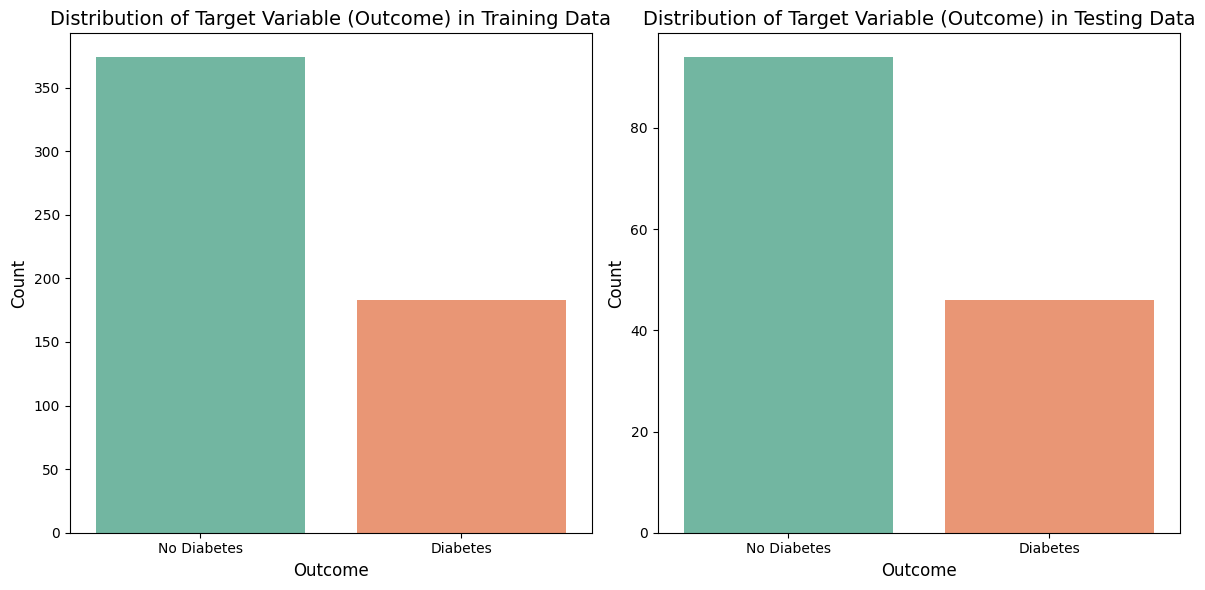

In [23]:
# Plotting the distribution of 'Outcome' variable in training and testing sets

# Plot for Y_train distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=Y_train, hue=Y_train, palette='Set2', legend=False)
plt.title('Distribution of Target Variable (Outcome) in Training Data', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], rotation=0)

# Plot for Y_test distribution
plt.subplot(1, 2, 2)
sns.countplot(x=Y_test, hue=Y_test, palette='Set2', legend=False)
plt.title('Distribution of Target Variable (Outcome) in Testing Data', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], rotation=0)

# Show the plots
plt.tight_layout()
plt.show()


# Data Modelling

In [24]:
# Logistic Regression Algorithm
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

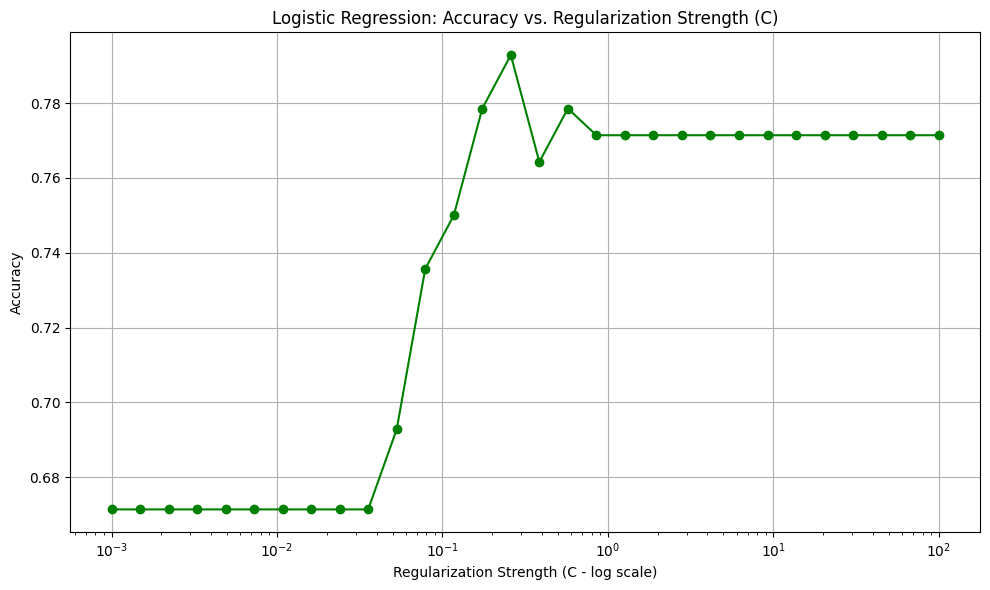

Highest Accuracy: 0.7929 at C = 0.2593


In [25]:
# Define a range of C values
C_values = np.logspace(-3, 2, 30)  # From 0.001 to 100
accuracies = []

# Loop through different C values and calculate accuracy
for c in C_values:
    model = LogisticRegression(C=c, max_iter=1000, solver='liblinear')
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(Y_test, preds)
    accuracies.append(acc)

# Plotting the accuracy for different C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o', linestyle='-', color='green')
plt.xscale('log')
plt.title('Logistic Regression: Accuracy vs. Regularization Strength (C)')
plt.xlabel('Regularization Strength (C - log scale)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying the highest accuracy
print(f"Highest Accuracy: {max(accuracies):.4f} at C = {C_values[np.argmax(accuracies)]:.4f}")


In [26]:
# Define models
models = { 
    "Logistic Regression": LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=24, metric='minkowski', p=2),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)
}

In [27]:
# Initialize containers
predictions = {}
accuracies = {}
confusion_matrices = {}
classification_reports = {}

In [28]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    accuracies[name] = accuracy_score(Y_test, y_pred)
    confusion_matrices[name] = confusion_matrix(Y_test, y_pred)
    classification_reports[name] = classification_report(Y_test, y_pred, output_dict=True)

    # Print first 10 predictions
    console.print(Panel(f"{name} First 10 Predictions:\n{y_pred[:10]}", title=f"[bold yellow]{name}", border_style="blue"))

╭────────────────────────────────────────────── Logistic Regression ──────────────────────────────────────────────╮
│ Logistic Regression First 10 Predictions:                                                                       │
│ [0 0 0 0 0 0 0 0 0 1]                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────────── KNN ──────────────────────────────────────────────────────╮
│ KNN First 10 Predictions:                                                                                       │
│ [0 0 0 0 1 0 0 0 0 0]                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Naive Bayes ──────────────────────────────────────────────────╮
│ Naive Bayes First 10 Predictions:                                                                               │
│ [0 0 0 0 1 1 0 0 1 1]                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────────── SVC ──────────────────────────────────────────────────────╮
│ SVC First 10 Predictions:                                                                                       │
│ [0 0 0 0 0 0 0 0 0 1]                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────── Decision Tree ─────────────────────────────────────────────────╮
│ Decision Tree First 10 Predictions:                                                                             │
│ [0 0 0 0 1 1 0 0 1 0]                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────── Random Forest ─────────────────────────────────────────────────╮
│ Random Forest First 10 Predictions:                                                                             │
│ [0 0 0 0 1 1 1 0 0 1]                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [29]:
#  Accuracy Table
accuracy_table = Table(title="Model Accuracy", box=None, border_style="green")
accuracy_table.add_column("Model", style="bold magenta")
accuracy_table.add_column("Accuracy", style="bold yellow")
for name, acc in accuracies.items():
    accuracy_table.add_row(name, f"{acc:.4f}")
console.print(Panel(accuracy_table, title="[bold green]Accuracy Summary", border_style="green"))

╭─────────────────────────────────────────────── Accuracy Summary ────────────────────────────────────────────────╮
│         Model Accuracy                                                                                          │
│  Model                Accuracy                                                                                  │
│  Logistic Regression  0.7429                                                                                    │
│  KNN                  0.7857                                                                                    │
│  Naive Bayes          0.7571                                                                                    │
│  SVC                  0.7786                                                                                    │
│  Decision Tree        0.7286                                                                                    │
│  Random Forest        0.7429                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [30]:
# Save accuracies to CSV
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"])
accuracy_df.to_csv("model_accuracies.csv", index=False)

console.print("[bold cyan]Model accuracies saved to [green]model_accuracies.csv[/green].")

Model accuracies saved to model_accuracies.csv.

In [31]:
# Confusion Matrices
for name, matrix in confusion_matrices.items():
    table = Table(title=f"{name} Confusion Matrix", show_header=True, header_style="bold cyan")
    table.add_column("Pred\\Actual", style="bold")
    for i in range(len(matrix)):
        table.add_column(str(i))
    for i, row in enumerate(matrix):
        table.add_row(str(i), *[str(val) for val in row])
    console.print(Panel(table, title=f"[cyan]{name} - Confusion Matrix", border_style="cyan"))

╭──────────────────────────────────── Logistic Regression - Confusion Matrix ─────────────────────────────────────╮
│    Logistic Regression                                                                                          │
│     Confusion Matrix                                                                                            │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━┓                                                                                       │
│ ┃ Pred\Actual ┃ 0  ┃ 1  ┃                                                                                       │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━┩                                                                                       │
│ │ 0           │ 93 │ 1  │                                                                                       │
│ │ 1           │ 35 │ 11 │                                                                                       │
│ └─────────────┴────┴────┘                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── KNN - Confusion Matrix ─────────────────────────────────────────────╮
│   KNN Confusion Matrix                                                                                          │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━┓                                                                                       │
│ ┃ Pred\Actual ┃ 0  ┃ 1  ┃                                                                                       │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━┩                                                                                       │
│ │ 0           │ 87 │ 7  │                                                                                       │
│ │ 1           │ 23 │ 23 │                                                                                       │
│ └─────────────┴────┴────┘                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Naive Bayes - Confusion Matrix ─────────────────────────────────────────╮
│   Naive Bayes Confusion                                                                                         │
│          Matrix                                                                                                 │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━┓                                                                                       │
│ ┃ Pred\Actual ┃ 0  ┃ 1  ┃                                                                                       │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━┩                                                                                       │
│ │ 0           │ 68 │ 26 │                                                                                       │
│ │ 1           │ 8  │ 38 │                                                                                       │
│ └─────────────┴────┴────┘                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── SVC - Confusion Matrix ─────────────────────────────────────────────╮
│   SVC Confusion Matrix                                                                                          │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━┓                                                                                       │
│ ┃ Pred\Actual ┃ 0  ┃ 1  ┃                                                                                       │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━┩                                                                                       │
│ │ 0           │ 84 │ 10 │                                                                                       │
│ │ 1           │ 21 │ 25 │                                                                                       │
│ └─────────────┴────┴────┘                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Decision Tree - Confusion Matrix ────────────────────────────────────────╮
│  Decision Tree Confusion                                                                                        │
│          Matrix                                                                                                 │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━┓                                                                                       │
│ ┃ Pred\Actual ┃ 0  ┃ 1  ┃                                                                                       │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━┩                                                                                       │
│ │ 0           │ 76 │ 18 │                                                                                       │
│ │ 1           │ 20 │ 26 │                                                                                       │
│ └─────────────┴────┴────┘                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Random Forest - Confusion Matrix ────────────────────────────────────────╮
│  Random Forest Confusion                                                                                        │
│          Matrix                                                                                                 │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━┓                                                                                       │
│ ┃ Pred\Actual ┃ 0  ┃ 1  ┃                                                                                       │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━┩                                                                                       │
│ │ 0           │ 77 │ 17 │                                                                                       │
│ │ 1           │ 19 │ 27 │                                                                                       │
│ └─────────────┴────┴────┘                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

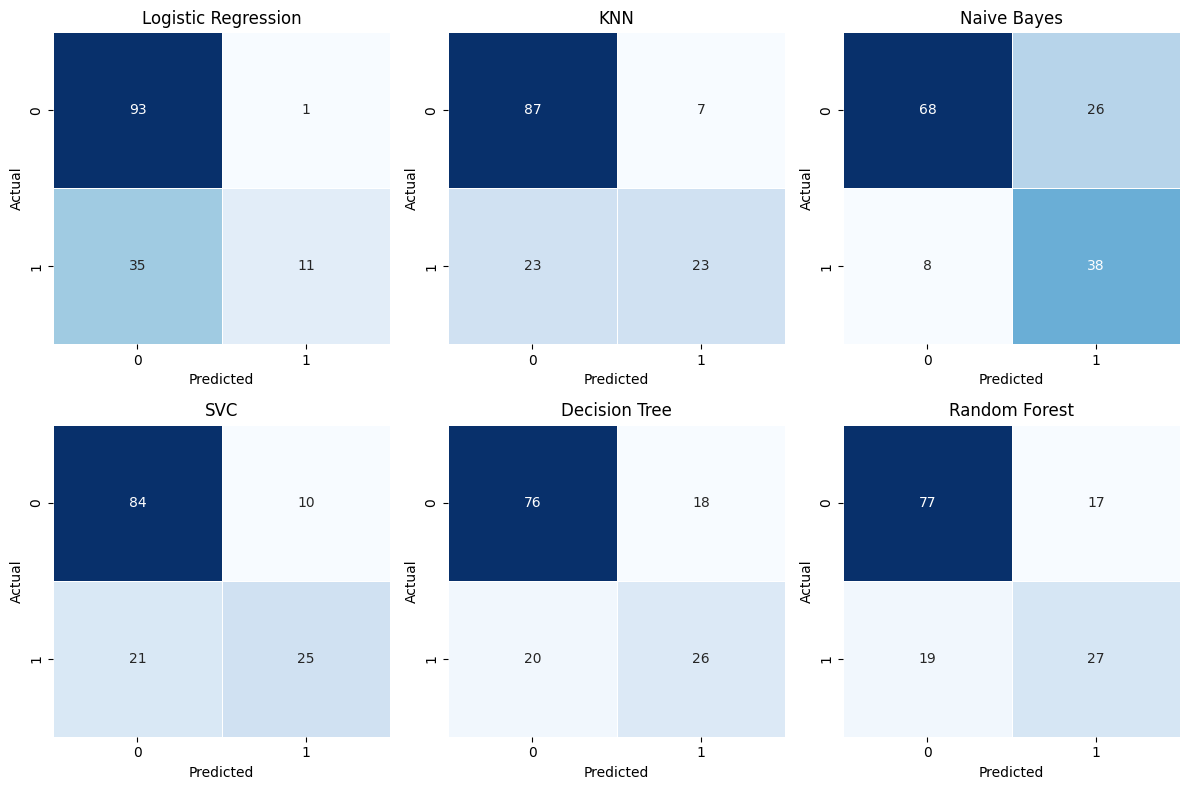

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, (name, cm) in zip(axes.ravel(), confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                linewidths=0.5, cbar=False, ax=ax)
    ax.set_title(f"{name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [33]:
# Classification Reports
for name, report in classification_reports.items():
    table = Table(title=f"{name} Classification Report", show_header=True, header_style="bold red")
    table.add_column("Class")
    table.add_column("Precision")
    table.add_column("Recall")
    table.add_column("F1-Score")
    for label, scores in report.items():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:
            table.add_row(label, f"{scores['precision']:.2f}", f"{scores['recall']:.2f}", f"{scores['f1-score']:.2f}")
    console.print(Panel(table, title=f"[red]{name} - Classification Report", border_style="red"))

╭────────────────────────────────── Logistic Regression - Classification Report ──────────────────────────────────╮
│ Logistic Regression Classification Report                                                                       │
│ ┏━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓                                                                       │
│ ┃ Class ┃ Precision ┃ Recall ┃ F1-Score ┃                                                                       │
│ ┡━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩                                                                       │
│ │ 0     │ 0.73      │ 0.99   │ 0.84     │                                                                       │
│ │ 1     │ 0.92      │ 0.24   │ 0.38     │                                                                       │
│ └───────┴───────────┴────────┴──────────┘                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────── KNN - Classification Report ──────────────────────────────────────────╮
│         KNN Classification Report                                                                               │
│ ┏━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓                                                                       │
│ ┃ Class ┃ Precision ┃ Recall ┃ F1-Score ┃                                                                       │
│ ┡━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩                                                                       │
│ │ 0     │ 0.79      │ 0.93   │ 0.85     │                                                                       │
│ │ 1     │ 0.77      │ 0.50   │ 0.61     │                                                                       │
│ └───────┴───────────┴────────┴──────────┘                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Naive Bayes - Classification Report ──────────────────────────────────────╮
│     Naive Bayes Classification Report                                                                           │
│ ┏━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓                                                                       │
│ ┃ Class ┃ Precision ┃ Recall ┃ F1-Score ┃                                                                       │
│ ┡━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩                                                                       │
│ │ 0     │ 0.89      │ 0.72   │ 0.80     │                                                                       │
│ │ 1     │ 0.59      │ 0.83   │ 0.69     │                                                                       │
│ └───────┴───────────┴────────┴──────────┘                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────── SVC - Classification Report ──────────────────────────────────────────╮
│         SVC Classification Report                                                                               │
│ ┏━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓                                                                       │
│ ┃ Class ┃ Precision ┃ Recall ┃ F1-Score ┃                                                                       │
│ ┡━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩                                                                       │
│ │ 0     │ 0.80      │ 0.89   │ 0.84     │                                                                       │
│ │ 1     │ 0.71      │ 0.54   │ 0.62     │                                                                       │
│ └───────┴───────────┴────────┴──────────┘                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Decision Tree - Classification Report ─────────────────────────────────────╮
│    Decision Tree Classification Report                                                                          │
│ ┏━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓                                                                       │
│ ┃ Class ┃ Precision ┃ Recall ┃ F1-Score ┃                                                                       │
│ ┡━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩                                                                       │
│ │ 0     │ 0.79      │ 0.81   │ 0.80     │                                                                       │
│ │ 1     │ 0.59      │ 0.57   │ 0.58     │                                                                       │
│ └───────┴───────────┴────────┴──────────┘                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Random Forest - Classification Report ─────────────────────────────────────╮
│    Random Forest Classification Report                                                                          │
│ ┏━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓                                                                       │
│ ┃ Class ┃ Precision ┃ Recall ┃ F1-Score ┃                                                                       │
│ ┡━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩                                                                       │
│ │ 0     │ 0.80      │ 0.82   │ 0.81     │                                                                       │
│ │ 1     │ 0.61      │ 0.59   │ 0.60     │                                                                       │
│ └───────┴───────────┴────────┴──────────┘                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [34]:

# Best model selection
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
console.print(Panel(f"[bold green]Best Model: {best_model_name} (Accuracy: {accuracies[best_model_name]:.4f})", border_style="bright_green"))

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Best Model: KNN (Accuracy: 0.7857)                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [35]:
# Saving the best model
model_filename = f"{best_model_name}_best_model.pkl"
joblib.dump(best_model, model_filename)
console.print(f"[bold cyan]The best model has been saved as {model_filename}.", style="bold green")

The best model has been saved as KNN_best_model.pkl.